#Implement a KNN model to classify the animals in to categorie

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Zoo.csv to Zoo (1).csv


In [6]:
zoo = pd.read_csv("Zoo.csv")

In [7]:
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [8]:
zoo.shape

(101, 18)

In [9]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [10]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [11]:
zoo.duplicated().sum()

0

In [12]:
type=zoo["type"].value_counts()
type

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

Data visualization using correlation and heat map

In [13]:
!pip install dython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
from dython.nominal import associations

In [15]:
zoo1 = zoo.drop("animal name",axis=1)
zoo1.head(1)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1


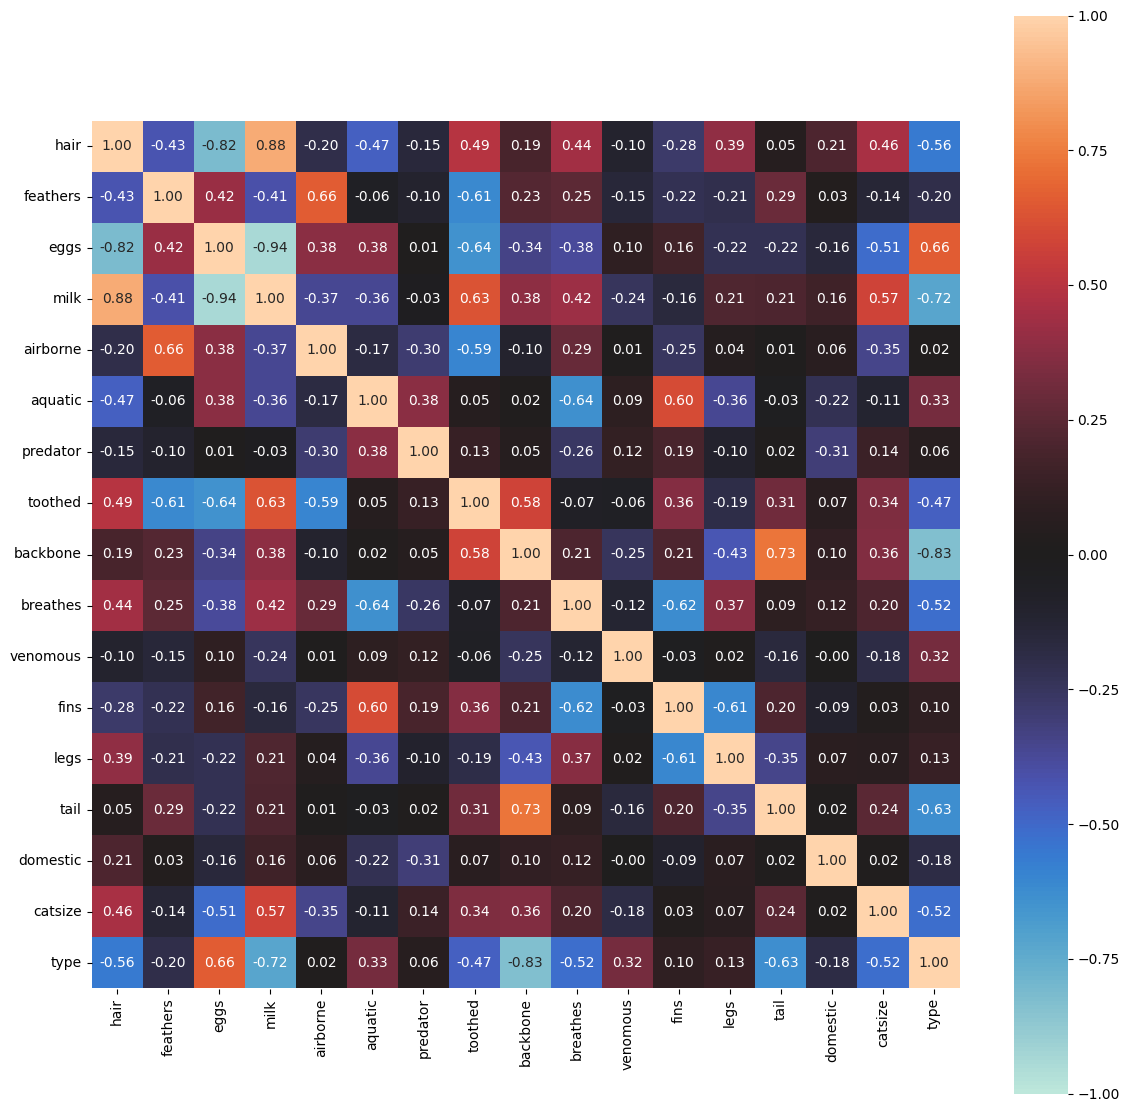

{'corr':               hair  feathers      eggs      milk  airborne   aquatic  \
 hair      1.000000 -0.427851 -0.817382  0.878503 -0.198431 -0.473554   
 feathers -0.427851  1.000000  0.419248 -0.410761  0.656553 -0.058552   
 eggs     -0.817382  0.419248  1.000000 -0.938848  0.376646  0.376244   
 milk      0.878503 -0.410761 -0.938848  1.000000 -0.366765 -0.362613   
 airborne -0.198431  0.656553  0.376646 -0.366765  1.000000 -0.172638   
 aquatic  -0.473554 -0.058552  0.376244 -0.362613 -0.172638  1.000000   
 predator -0.154769 -0.104430  0.011605 -0.029721 -0.295181  0.375978   
 toothed   0.492531 -0.613631 -0.642150  0.628168 -0.594311  0.053150   
 backbone  0.191681  0.231403 -0.340420  0.384958 -0.104718  0.022463   
 breathes  0.441149  0.254588 -0.382777  0.423527  0.286039 -0.637506   
 venomous -0.104245 -0.145739  0.098689 -0.242449  0.008528  0.087915   
 fins     -0.280313 -0.223541  0.164796 -0.156328 -0.251157  0.604492   
 legs      0.394009 -0.206686 -0.224918  0.

In [16]:
associations(zoo1, figsize=(14,14))

<Axes: >

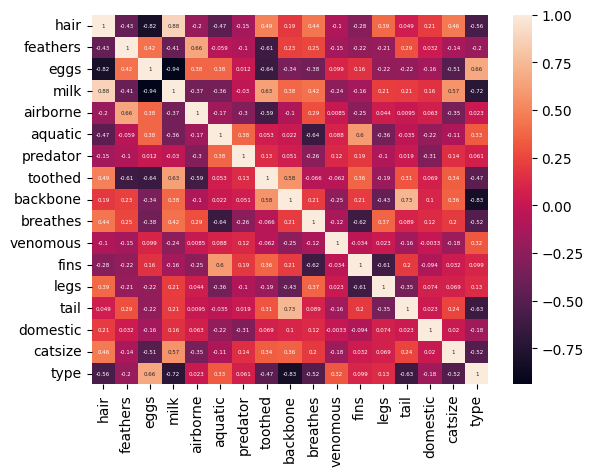

In [17]:
sns.heatmap(zoo1.corr(), annot=True, annot_kws={"size":4})

<Axes: xlabel='legs', ylabel='count'>

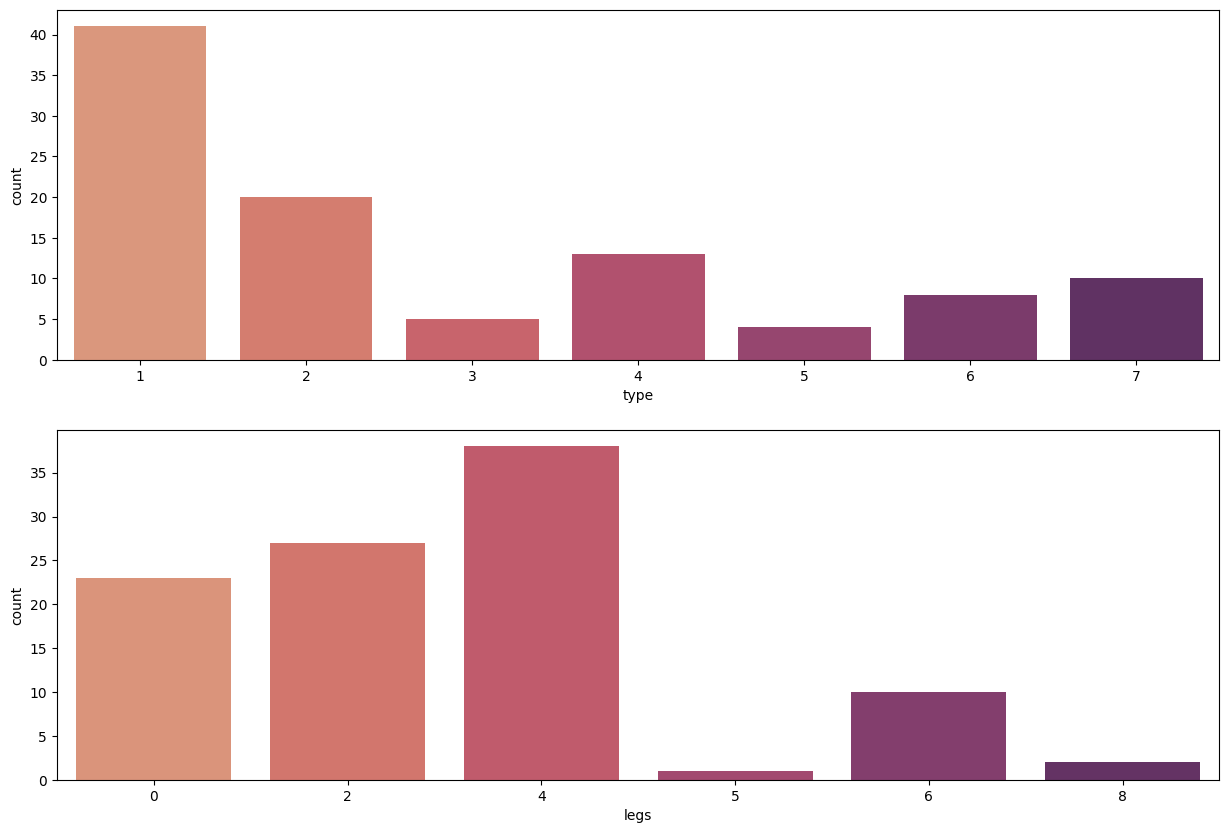

In [21]:
fig, ax = plt.subplots(2,1, figsize=(15,10))

sns.countplot(x="type", data=zoo, palette='flare', ax=ax[0])
sns.countplot(x="legs", data=zoo, palette='flare', ax=ax[1])

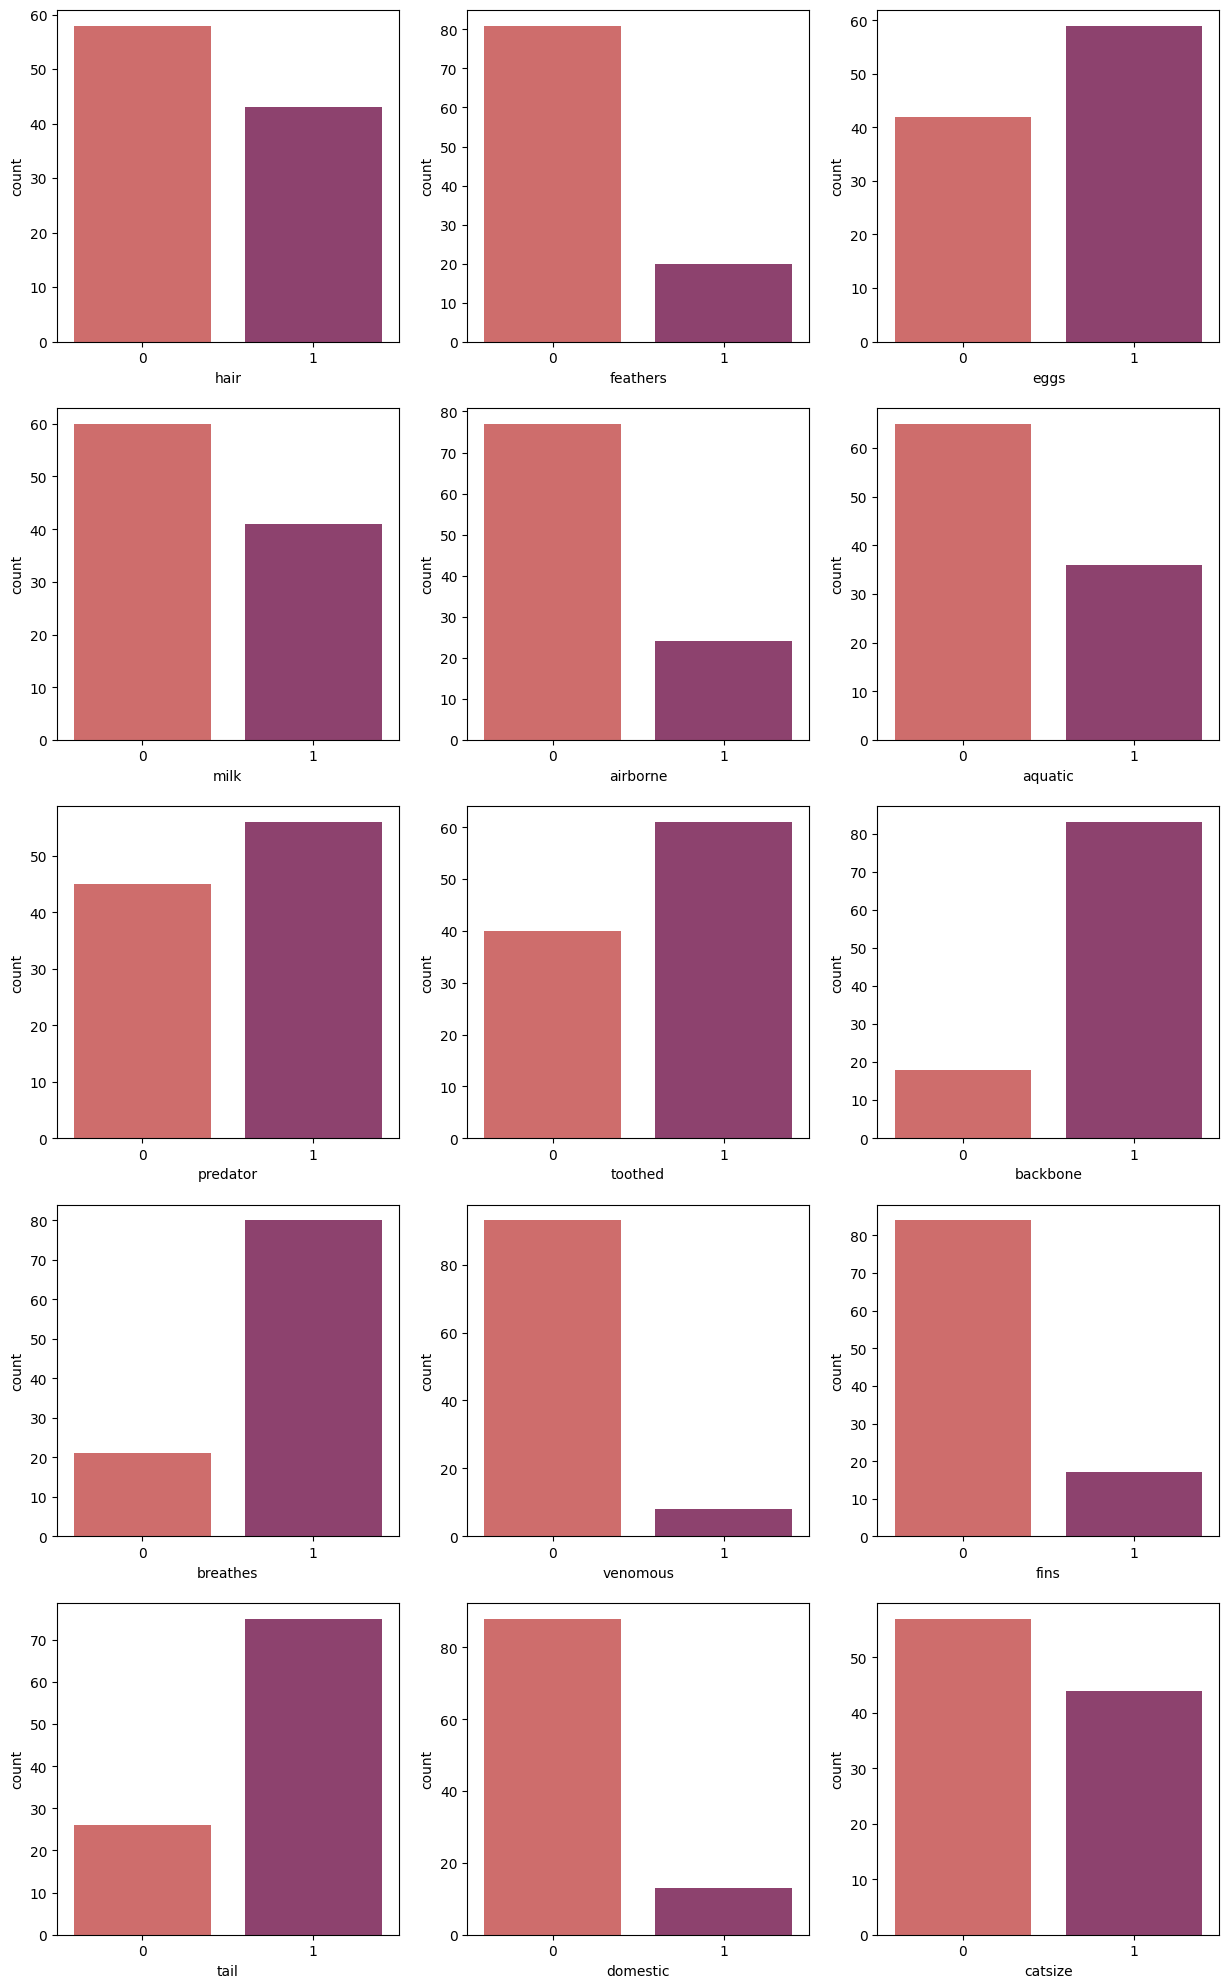

In [22]:
fig, ax =plt.subplots(5,3, figsize=(15,25))


sns.countplot(x='hair',data=zoo, palette='flare', ax=ax[0,0])
sns.countplot(x='feathers',data=zoo, palette='flare', ax=ax[0,1])
sns.countplot(x='eggs',data=zoo, palette='flare', ax=ax[0,2])

sns.countplot(x='milk',data=zoo, palette='flare', ax=ax[1,0])
sns.countplot(x='airborne',data=zoo, palette='flare', ax=ax[1,1])
sns.countplot(x='aquatic',data=zoo, palette='flare', ax=ax[1,2])

sns.countplot(x='predator',data=zoo, palette='flare', ax=ax[2,0])
sns.countplot(x='toothed',data=zoo, palette='flare', ax=ax[2,1])
sns.countplot(x='backbone',data=zoo, palette='flare', ax=ax[2,2])

sns.countplot(x='breathes',data=zoo, palette='flare', ax=ax[3,0])
sns.countplot(x='venomous',data=zoo, palette='flare', ax=ax[3,1])
sns.countplot(x='fins',data=zoo, palette='flare', ax=ax[3,2])

sns.countplot(x='tail',data=zoo, palette='flare', ax=ax[4,0])
sns.countplot(x='domestic',data=zoo, palette='flare', ax=ax[4,1])
sns.countplot(x='catsize',data=zoo, palette='flare', ax=ax[4,2]);

Data preprocessing

In [23]:
x = zoo.drop(['type','animal name'], axis=1)
y = zoo[["type"]]

In [24]:
x.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [25]:
y.head()

,type
0,1
1,1
2,4
3,1
4,1


In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [27]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((70, 16), (31, 16), (70, 1), (31, 1))

To choose the k value --->initially we take k=5

In [28]:
kfold=KFold(n_splits=10)
model=KNeighborsClassifier(n_neighbors=5)
result=cross_val_score(model,x,y,cv=kfold)
#here we use x and y because here we used a kfold cv

In [29]:
print(result.mean()*100)

88.00000000000001


In [30]:
#we can use train_test_split also
model = KNeighborsClassifier(n_neighbors=5) # K = 5
model.fit(x_train,y_train)
pred_y = model.predict(x_test)
accuracy_score(y_test, pred_y)
print('Accuracy with k = 5 and train test split', accuracy_score(y_test, pred_y))

Accuracy with k = 5 and train test split 0.8709677419354839


GridSearch CV for finding best k value

In [31]:
n_neighbors = np.array(range(1,40,2))
grid_param= dict(n_neighbors=n_neighbors)

In [32]:
grid_param

{'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
        35, 37, 39])}

In [33]:
kfold= KFold(n_splits=10)

In [34]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=grid_param, cv=kfold)
grid.fit(x, y)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39])})

In [35]:
print(grid.best_params_)
print(grid.best_score_)

{'n_neighbors': 1}
0.9800000000000001


when we use k as 1 then overfitting condition is occures

In [36]:
n_neighbors= np.array(range(3,40,2))
param_grid=dict(n_neighbors=n_neighbors)
param_grid

{'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
        37, 39])}

In [37]:
model = KNeighborsClassifier()
grid= GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold)
grid.fit(x,y)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39])})

In [38]:
print(grid.best_params_)
print(grid.best_score_)

{'n_neighbors': 3}
0.9400000000000001


**we choose the k value as odd because**

When the value of K is set to even, a situation may arise in which the elements from both groups surrounding new datapoint are equal.

In this condition, the model would be unable to do the correct classification. Here the model will randomly assign any of the two classes to this new unknown data.

Choosing an odd value for K is preferred because such a state of equality between the two classes would never occur here. Due to the fact that one of the two groups would still be in the majority, the value of K is selected as odd.

**visualize the k value and the performance**

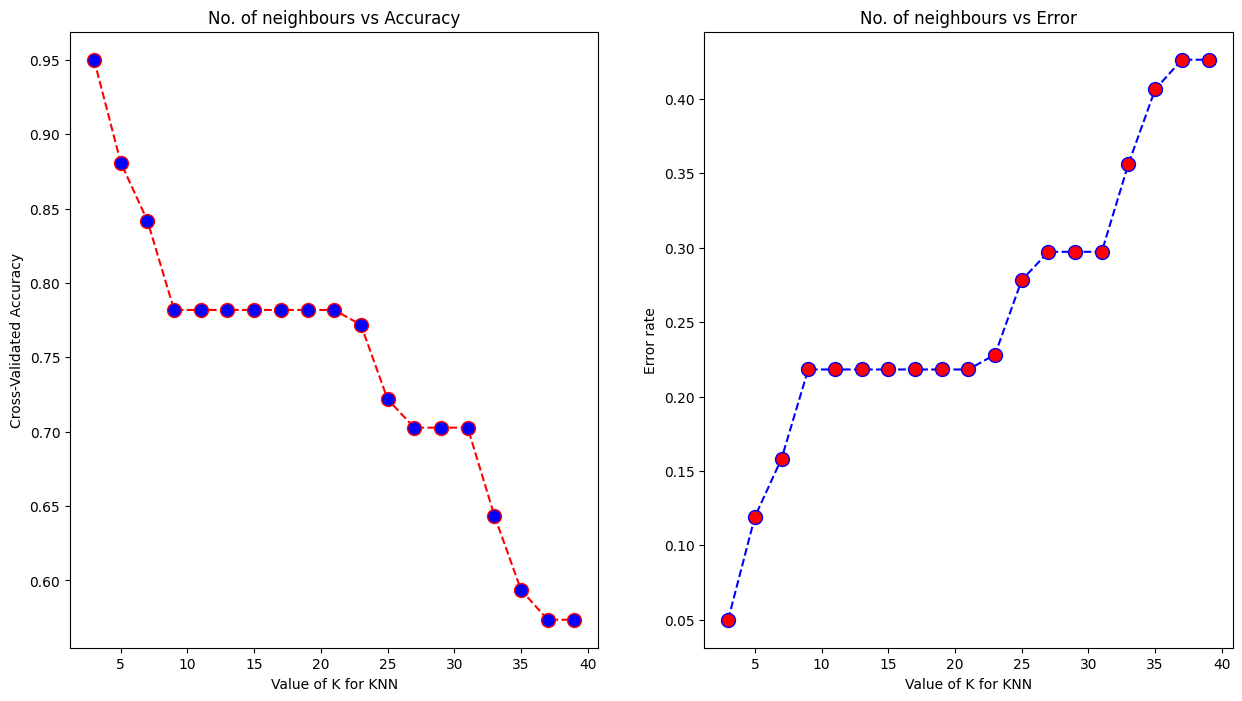

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

# choose k between 3 to 39
k_range =np.array(range(3,40,2))
k_scores = []
error_rate = []

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=10)
    k_scores.append(scores.mean())

    error_rate.append((1-scores.mean()))



plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.plot(k_range, k_scores, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('No. of neighbours vs Accuracy')

plt.subplot(1,2,2)
plt.plot(k_range , error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.xlabel('Value of K for KNN')
plt.ylabel('Error rate')
plt.title('No. of neighbours vs Error')

plt.show()

Build the model k=3

In [40]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)
pred_y = model.predict(x_test)
accuracy_score(y_test, pred_y)

0.9354838709677419

In [41]:
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         2
           6       0.83      1.00      0.91         5
           7       1.00      0.67      0.80         3

    accuracy                           0.94        31
   macro avg       0.79      0.81      0.79        31
weighted avg       0.92      0.94      0.92        31



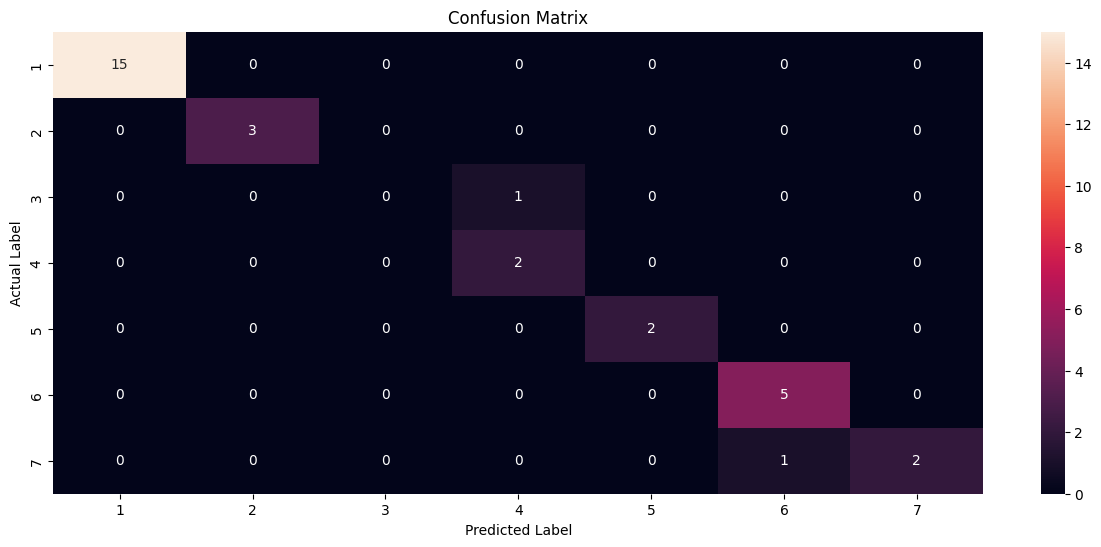

In [43]:
cm_df = confusion_matrix(y_test, pred_y)
class_label = ['1','2','3','4','5','6','7'] #class 3 is absent in test set

df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
plt.figure(figsize=(15,6))
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

#2. Prepare a model for glass classification using KNN

Data Description:

RI : refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type: Type of glass: (class attribute)
1 -- building_windows_float_processed
 2 --building_windows_non_float_processed
 3 --vehicle_windows_float_processed
 4 --vehicle_windows_non_float_processed (none in this database)
 5 --containers
 6 --tableware
 7 --headlamps


In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [45]:
from google.colab import files
uploaded= files.upload()

Saving glass.csv to glass.csv


In [46]:
glass = pd.read_csv("glass.csv")

In [47]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [48]:
glass['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [49]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [50]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [51]:
glass[glass.duplicated()].shape

(1, 10)

In [52]:
glass[glass.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [53]:
df = glass.drop_duplicates()

In [54]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [56]:
corr=df.corr()

In [57]:
corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


<Axes: >

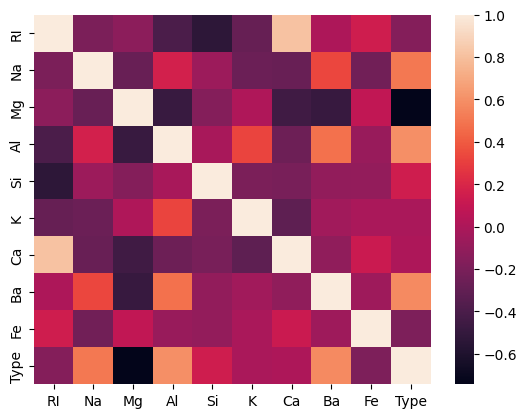

In [58]:
sns.heatmap(corr)

We can notice that Ca and K values don't affect Type that much.

Also Ca and RI are highly correlated, this means using only RI is enough.

So we can go ahead and drop Ca, and also K.(performed later)

#Scatter plot of two features, and pairwise plot

<Axes: ylabel='RI'>

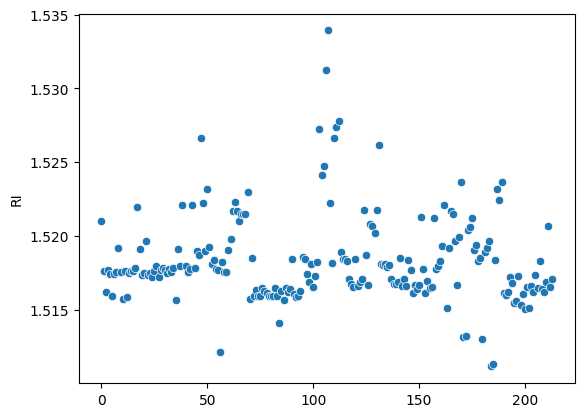

In [64]:
sns.scatterplot(df['RI'])

<Axes: xlabel='RI', ylabel='Na'>

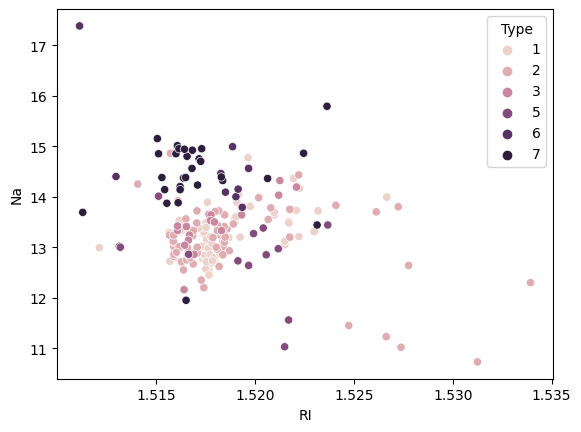

In [70]:
sns.scatterplot(data=df, x='RI', y='Na', hue=df['Type'])

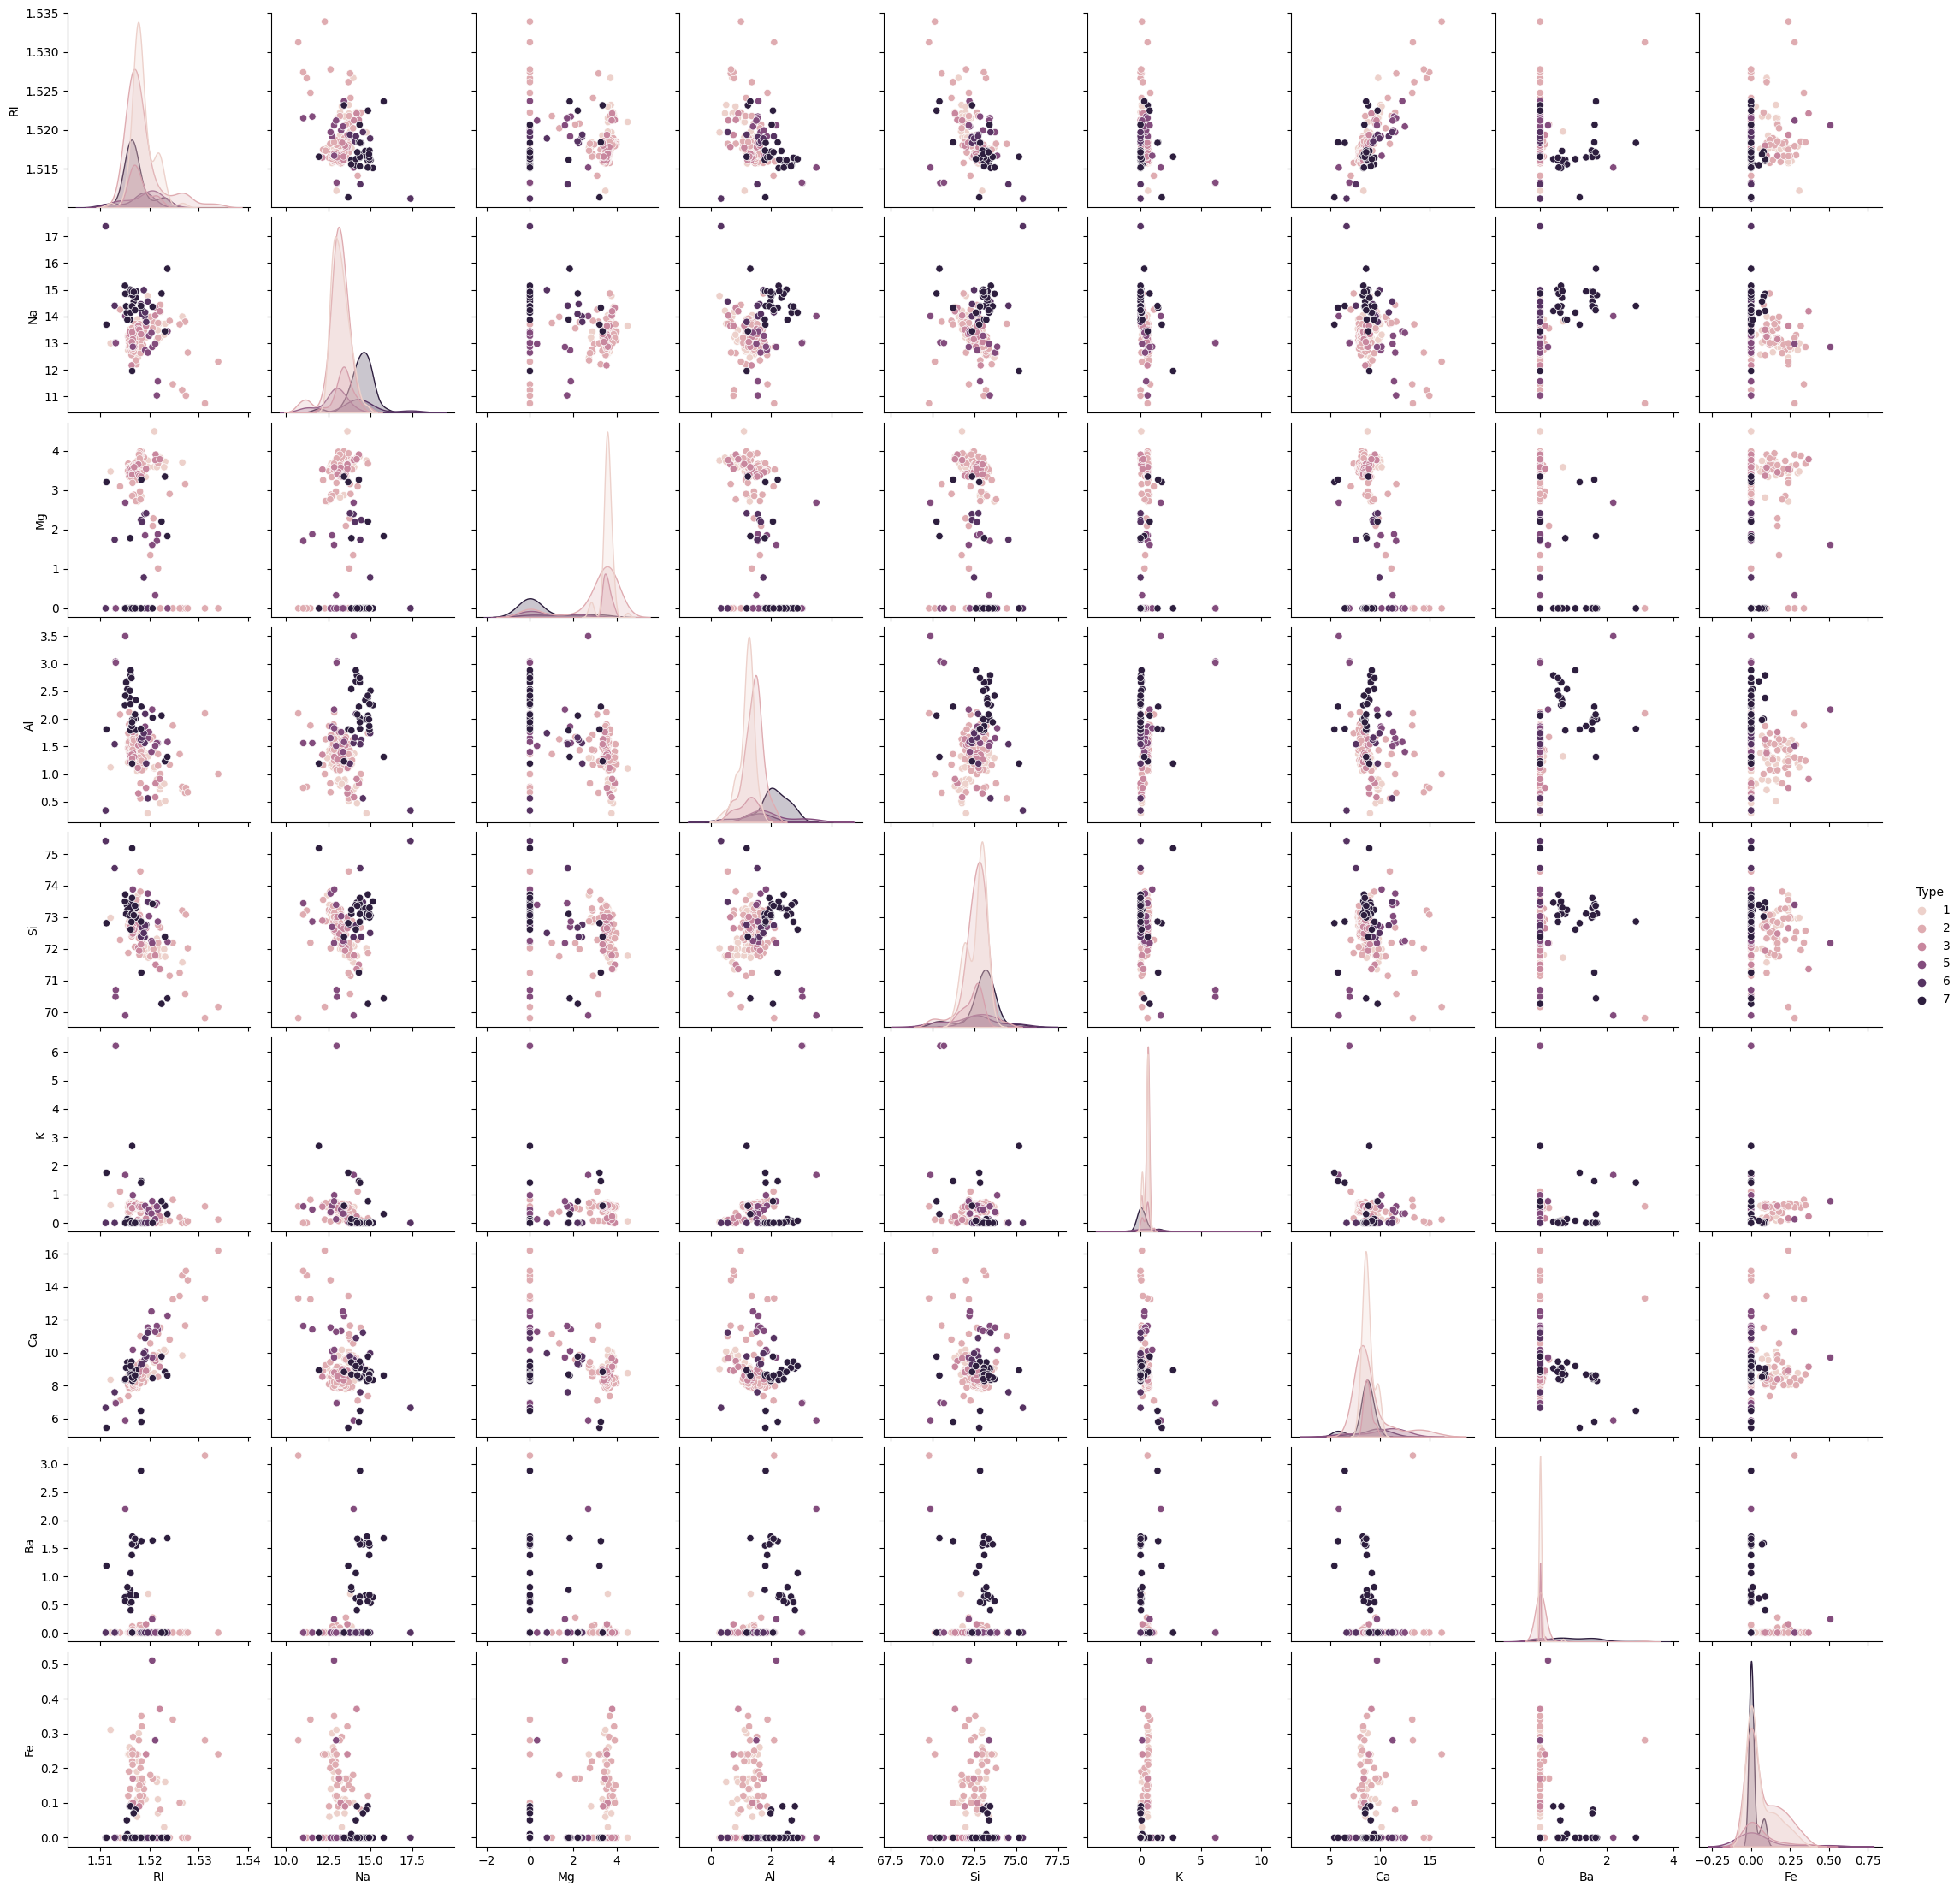

In [71]:
sns.pairplot(df, hue='Type')

In [72]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


#Feature Scaling

In [73]:
DF = df.iloc[:,0:9]

In [74]:
DF

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [75]:
array= DF.values

In [76]:
array

array([[ 1.52101, 13.64   ,  4.49   , ...,  8.75   ,  0.     ,  0.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  7.83   ,  0.     ,  0.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  7.78   ,  0.     ,  0.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  8.44   ,  1.64   ,  0.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  8.48   ,  1.57   ,  0.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  8.62   ,  1.67   ,  0.     ]])

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
#Normalization function
stscaler = StandardScaler().fit(array)
x = stscaler.transform(array)

In [79]:
x

array([[ 0.87984017,  0.28955813,  1.25723832, ..., -0.14346582,
        -0.35380764, -0.58830108],
       [-0.24381562,  0.59640332,  0.63931074, ..., -0.79020061,
        -0.35380764, -0.58830108],
       [-0.71641202,  0.15454625,  0.6045957 , ..., -0.82534924,
        -0.35380764, -0.58830108],
       ...,
       [ 0.76086485,  1.17327228, -1.86017161, ..., -0.36138732,
         2.94550057, -0.58830108],
       [-0.60735132,  1.19781989, -1.86017161, ..., -0.33326842,
         2.80467644, -0.58830108],
       [-0.40905912,  1.01371278, -1.86017161, ..., -0.23485225,
         3.00585377, -0.58830108]])

In [82]:
df_knn = pd.DataFrame(x, columns=df.columns[:-1])
df_knn

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.879840,0.289558,1.257238,-0.706370,-1.133248,-0.673480,-0.143466,-0.353808,-0.588301
1,-0.243816,0.596403,0.639311,-0.180863,0.097037,-0.028962,-0.790201,-0.353808,-0.588301
2,-0.716412,0.154546,0.604596,0.182950,0.433746,-0.167073,-0.825349,-0.353808,-0.588301
3,-0.227291,-0.238216,0.701798,-0.322346,-0.058368,0.109149,-0.516041,-0.353808,-0.588301
4,-0.306608,-0.164573,0.653197,-0.423405,0.550299,0.078457,-0.621487,-0.353808,-0.588301
...,...,...,...,...,...,...,...,...,...
208,-0.699888,0.903249,-1.860172,2.891336,-0.058368,-0.642789,0.158812,1.778672,-0.588301
209,-0.494986,1.860605,-1.860172,1.092483,0.524398,-0.765554,-0.389506,2.844912,-0.588301
210,0.760865,1.173272,-1.860172,1.153118,0.990612,-0.765554,-0.361387,2.945501,-0.588301
211,-0.607351,1.197820,-1.860172,0.991424,1.236668,-0.765554,-0.333268,2.804676,-0.588301


In [83]:
x= df_knn
y= df['Type']

In [84]:
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.879840,0.289558,1.257238,-0.706370,-1.133248,-0.673480,-0.143466,-0.353808,-0.588301
1,-0.243816,0.596403,0.639311,-0.180863,0.097037,-0.028962,-0.790201,-0.353808,-0.588301
2,-0.716412,0.154546,0.604596,0.182950,0.433746,-0.167073,-0.825349,-0.353808,-0.588301
3,-0.227291,-0.238216,0.701798,-0.322346,-0.058368,0.109149,-0.516041,-0.353808,-0.588301
4,-0.306608,-0.164573,0.653197,-0.423405,0.550299,0.078457,-0.621487,-0.353808,-0.588301
...,...,...,...,...,...,...,...,...,...
208,-0.699888,0.903249,-1.860172,2.891336,-0.058368,-0.642789,0.158812,1.778672,-0.588301
209,-0.494986,1.860605,-1.860172,1.092483,0.524398,-0.765554,-0.389506,2.844912,-0.588301
210,0.760865,1.173272,-1.860172,1.153118,0.990612,-0.765554,-0.361387,2.945501,-0.588301
211,-0.607351,1.197820,-1.860172,0.991424,1.236668,-0.765554,-0.333268,2.804676,-0.588301


In [85]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 213, dtype: int64

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)
x_train

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
173,0.737731,-0.680073,-0.742348,1.456296,-0.615233,0.400716,0.524358,0.129018,4.649990
137,-0.531339,-0.753716,0.583767,0.182950,0.912909,0.247260,-0.740993,-0.353808,-0.588301
65,1.048389,-0.434597,0.674026,-1.171243,-0.563432,-0.473986,0.629804,-0.353808,1.157796
108,-0.055438,0.387749,-1.860172,-1.797810,2.324499,-0.765554,1.431193,-0.353808,-0.588301
181,0.268439,0.915522,-1.860172,1.294601,0.109987,-0.765554,1.353866,-0.353808,-0.588301
...,...,...,...,...,...,...,...,...,...
106,5.149732,-1.355132,-1.860172,-0.908489,-3.231207,-0.581406,5.086650,-0.353808,1.876777
14,-0.237206,-0.974644,0.632368,-0.281922,0.822257,0.124494,-0.319209,-0.353808,-0.588301
92,-0.808948,-0.201394,0.458793,0.041467,0.576200,-0.167073,-0.516041,-0.353808,-0.588301
179,-1.770666,1.222368,-0.652088,0.182950,2.454002,-0.765554,-0.958914,-0.353808,-0.588301


In [87]:
x_test

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
9,-0.263645,-0.495966,0.639311,-0.180863,0.433746,0.109149,-0.389506,-0.353808,0.541526
197,-1.003936,1.197820,-1.860172,2.446676,0.576200,-0.704171,0.088515,0.933727,-0.588301
66,1.048389,-0.434597,0.674026,-1.171243,-0.433928,-0.473986,0.629804,-0.353808,1.157796
191,-0.699888,0.976891,-1.860172,2.709430,1.042413,-0.704171,0.060396,0.450902,0.336103
117,-0.534644,-0.127751,0.667083,0.162738,-0.161971,0.231914,-0.649606,-0.353808,2.390335
...,...,...,...,...,...,...,...,...,...
67,1.048389,-0.348680,0.625425,-1.110607,-0.589333,-0.412604,0.608715,-0.353808,1.055084
5,-0.789119,-0.753716,0.646254,0.344645,0.407845,0.216568,-0.621487,-0.353808,2.082200
135,-0.095096,-0.495966,0.778171,-0.746794,0.537349,0.093803,-0.403566,-0.353808,0.644238
56,-0.035609,-0.655525,0.555995,-0.322346,0.381944,0.155186,-0.368417,-0.353808,-0.588301


In [88]:
y_train

174    5
138    2
66     1
109    2
182    6
      ..
107    2
14     1
93     2
180    6
103    2
Name: Type, Length: 149, dtype: int64

In [89]:
y_test

9      1
198    7
67     1
192    7
118    2
      ..
68     1
5      1
136    2
57     1
200    7
Name: Type, Length: 64, dtype: int64

#KNN Model

In [90]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [91]:
#Predicting on test data
preds = model.predict(x_test)
pd.Series(preds).value_counts()

1    26
2    24
7     8
5     4
6     2
dtype: int64

In [92]:
pd.crosstab(y_test, preds)

col_0,1,2,5,6,7
Type,,,,,
1,16,2,0,0,0
2,6,16,2,0,0
3,3,1,0,0,0
5,0,2,2,0,0
6,0,1,0,2,0
7,1,2,0,0,8


In [93]:
print("Accuracy", accuracy_score(y_test, preds)*100)

Accuracy 68.75


In [94]:
model.score(x_train, y_train)

0.7919463087248322

In [95]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           1       0.62      0.89      0.73        18
           2       0.67      0.67      0.67        24
           3       0.00      0.00      0.00         4
           5       0.50      0.50      0.50         4
           6       1.00      0.67      0.80         3
           7       1.00      0.73      0.84        11

    accuracy                           0.69        64
   macro avg       0.63      0.57      0.59        64
weighted avg       0.67      0.69      0.67        64



#Grid Search for Algorithm Tuning

In [96]:
n_neighbors = np.array(range(1,15))
param_grid = dict(n_neighbors=n_neighbors)

In [97]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [99]:
print(grid.best_score_)
print(grid.best_params_)

0.6666666666666667
{'n_neighbors': 2}


#Visualizing the CV results

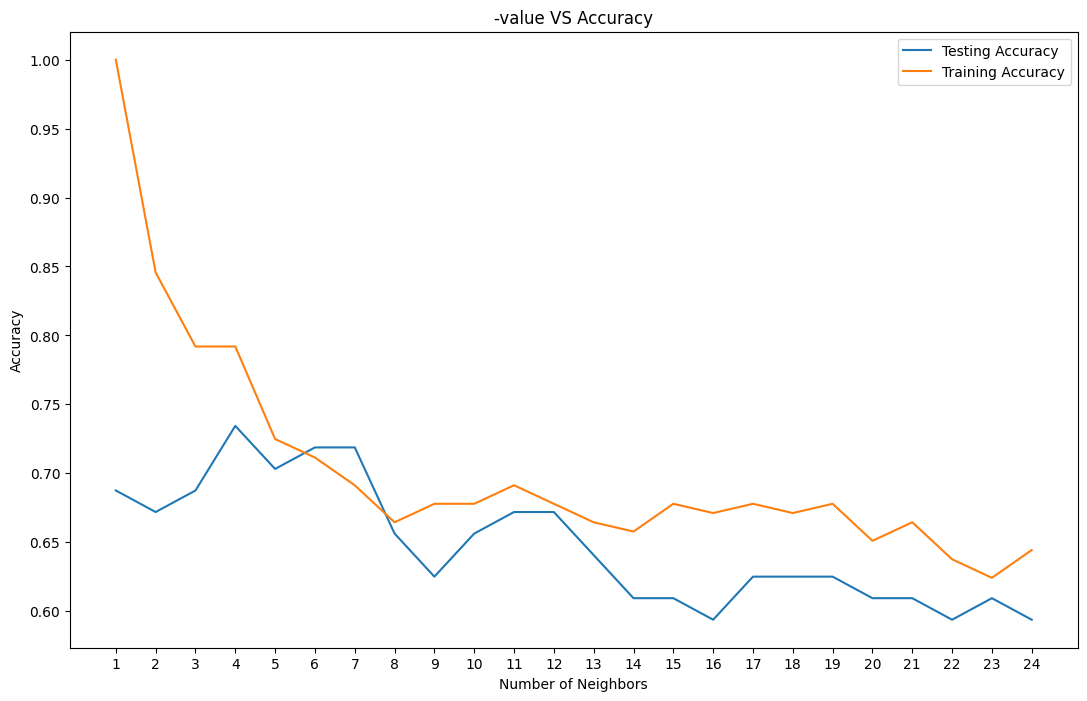

Best accuracy is 0.734375 with K = 4


In [100]:
k_values = np.arange(1,25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(k_values):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))
# Plot
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))